# **K-Vecinos más cercanos**

```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : K-NN en la clasificación de papas según su pulpa
```

# **1. PASO PREVIO**

## Importacion de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
# Librería: scikit learn, "sklearn"
# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix

## Importación de datos

In [2]:
# Creación de etiquetas para los pixeles
pixel_num = ['p' + str(i + 1) for i in range(90000)]
pixel_num.append('variedad')

In [3]:
datos = pd.read_csv("./B06_cortes.csv", sep=',', names=pixel_num, skiprows=[0])
# muestras los primero 5 valores
datos.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p89992,p89993,p89994,p89995,p89996,p89997,p89998,p89999,p90000,variedad
0,112,113,115,115,115,112,110,109,112,114,...,120,117,114,114,117,121,119,120,123,S35E01
1,106,103,101,101,101,100,99,99,95,91,...,123,120,117,116,117,117,118,120,121,S35E01
2,87,92,95,96,98,101,99,94,97,96,...,118,119,118,118,120,118,120,121,120,S35E01
3,92,93,95,95,89,80,78,81,82,85,...,118,120,121,121,120,117,119,120,119,S35E01
4,92,88,87,89,92,94,97,99,100,98,...,121,121,119,119,120,121,121,120,120,S35E01


## Informacion del dataset

In [4]:
## Informacion del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 0 to 622
Columns: 90001 entries, p1 to variedad
dtypes: int64(90000), object(1)
memory usage: 427.8+ MB


In [5]:
# Valores unicos de variedad de papas
variedades = datos.variedad.unique().tolist()
variedades

['S35E01',
 'S35E02',
 'S35E03',
 'S35E04',
 'S35E05',
 'S35E06',
 'S35E07',
 'S35E08',
 'S35E09',
 'S35E10',
 'S36E01',
 'S36E02',
 'S36E03',
 'S36E04',
 'S36E05',
 'S36E06',
 'S36E07',
 'S36E08',
 'S36E09',
 'S36E10']

In [6]:
# Contar cuantas papas hay en cada variedad
datos.variedad.value_counts()

variedad
S36E01    36
S35E01    35
S35E06    34
S35E05    33
S35E09    33
S36E06    33
S35E03    32
S36E05    32
S35E04    32
S35E02    31
S36E03    31
S36E09    30
S36E08    30
S36E07    30
S36E02    30
S36E04    30
S35E10    30
S36E10    30
S35E07    26
S35E08    25
Name: count, dtype: int64

## Conversion de datos de variedad a numerico

In [7]:
mapeo = {variedad:(variedades.index(variedad) + 1) for variedad in variedades}
datos['variedad'] = datos['variedad'].map(mapeo)
datos

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p89992,p89993,p89994,p89995,p89996,p89997,p89998,p89999,p90000,variedad
0,112,113,115,115,115,112,110,109,112,114,...,120,117,114,114,117,121,119,120,123,1
1,106,103,101,101,101,100,99,99,95,91,...,123,120,117,116,117,117,118,120,121,1
2,87,92,95,96,98,101,99,94,97,96,...,118,119,118,118,120,118,120,121,120,1
3,92,93,95,95,89,80,78,81,82,85,...,118,120,121,121,120,117,119,120,119,1
4,92,88,87,89,92,94,97,99,100,98,...,121,121,119,119,120,121,121,120,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,108,105,104,102,100,99,99,100,101,102,...,60,59,58,58,59,62,64,64,63,20
619,117,117,116,118,118,116,116,116,109,101,...,101,111,118,121,122,125,125,126,125,20
620,74,73,72,72,72,74,77,78,82,85,...,98,99,101,105,111,117,121,118,116,20
621,89,86,86,84,82,79,78,79,82,85,...,115,113,111,109,107,105,103,104,107,20


In [8]:
datos.variedad.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [9]:
datos.variedad.value_counts()

variedad
11    36
1     35
6     34
5     33
9     33
16    33
3     32
15    32
4     32
2     31
13    31
19    30
18    30
17    30
12    30
14    30
10    30
20    30
7     26
8     25
Name: count, dtype: int64

## Distribución de clases

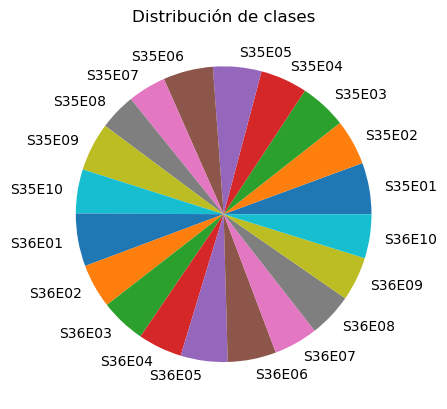

In [10]:
distribucion = datos.groupby('variedad').size()
plt.pie(distribucion, labels = variedades)
plt.title('Distribución de clases')
plt.show()

## Visualización de datos

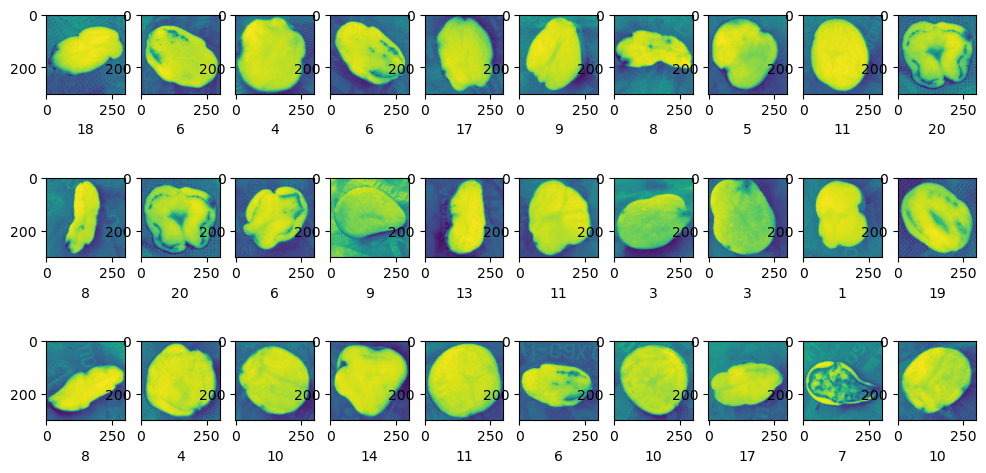

In [11]:
X = datos.drop(['variedad'], axis=1)
y = datos['variedad']
ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 10, figsize=(12,6))
for k in range(3):
    for j in range(10):
        azar = random.sample(range(ran),1)
        img = np.array(X.iloc[azar].values)
        img = np.array(img).reshape(300,300)
        ax[k,j].imshow(img)
        ax[k,j].set_xlabel(y[azar[0]])
plt.show()

## **2. SEPARACIÓN DE DATOS PARA TRAINING Y TESTING**

In [18]:
# Sparación de datos en entrada y salida
X = datos.drop(['variedad'], axis=1)
y = datos['variedad']
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state=5)

# **3. ENTRENAMIENTO Y TEST KNN**

In [23]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = 1)
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
print('Exactitud de K-NN, k=1, :', Exactitud)

Exactitud de K-NN, k=1, : 0.8235294117647058


## Matriz de confusión y exactitud

In [24]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[ 5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  4  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  1 11  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  8  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 11  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  1  0  0  4  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  1  0  6  0  2  1  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  6  0  0

<Axes: >

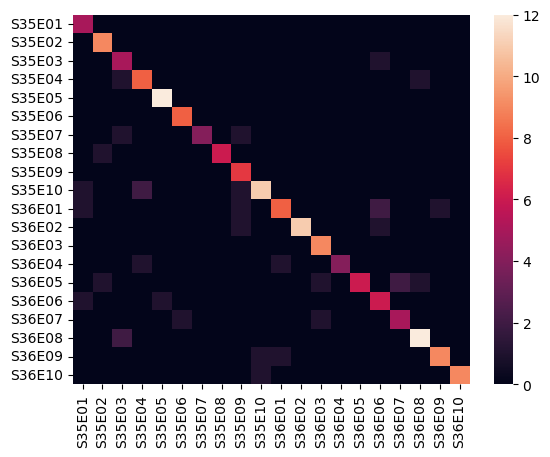

In [25]:
categorias = variedades
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

In [26]:
from sklearn.metrics import accuracy_score
# Calculo de acurracy (exactitud)
accuracy = accuracy_score(y_test, pred)
print('Exactitud: ',accuracy)

Exactitud:  0.8235294117647058


# **4. PREDICCIÓN DE NUEVOS CASOS**

In [27]:
import cv2
pixel = []
# Leer nuevo archivo de imagen en escala de grices
image = cv2.imread('./nuevo_corte.jpg', cv2.IMREAD_GRAYSCALE)
# Reescala la imagen a una dimension de 300x300 pixeles
image_rescaled = cv2.resize(image, (300,300), interpolation=cv2.INTER_AREA)
# Obtienen imagen vectorizado y etiquetado
img = np.reshape(image_rescaled, (90000))
pixel.append(img)
# Convierte array de imagenes a dataframe de pandas
nuevo=np.array(pixel)
nuevo

array([[71, 65, 66, ..., 65, 63, 61]], dtype=uint8)

In [28]:
y_pred = Modelo.predict(nuevo)

In [29]:
def get_keys_with_value(dic, value):
    return [key for key, val in dic.items() if val == value]

prediccion = get_keys_with_value(mapeo, y_pred)
print(f'El valor predecido es {prediccion.pop()} con una exactitud de {accuracy * 100}%')

El valor predecido es S36E07 con una exactitud de 82.35294117647058%
